In [1]:
import healpy as hp
import numpy as np
import pysm3.units as u
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator
from generate_mask import gen_cold_clump_mask as maskgen
import warnings
warnings.filterwarnings('ignore')
import os
os.environ[
    "OMP_NUM_THREADS"
]="64"

In [2]:
comp = "IQU"
mdir = "/global/project/projectdirs/cmb/data/planck2018/pr3/frequencymaps/"
m, h = hp.read_map(mdir + "HFI_SkyMap_353_2048_R3.01_full.fits",
                                       [c + "_STOKES" for c in comp], dtype = np.float64, h = True)
m <<= u.K_CMB
m = m.to('uK_RJ', equivalencies = u.cmb_equivalencies(353 * u.GHz))

In [3]:
mask = maskgen(2048, threshold = 0.9)
clean_m = m.copy()
m_masked = clean_m * mask

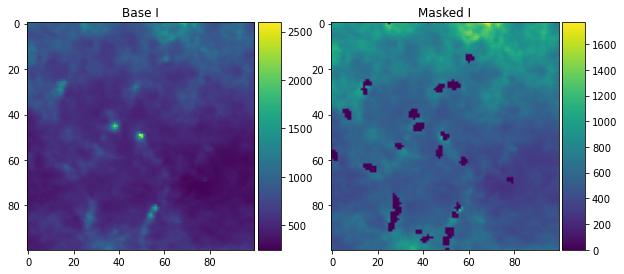

In [4]:
l,b = 110.66, 9.65251

base_I   = hp.gnomview(clean_m[0], rot = [l,b],
                       reso = 3.25, xsize = 100,
                       coord = 'G', no_plot = True,
                       return_projected_map = True)
masked_I = hp.gnomview(m_masked[0], rot = [l,b],
                       reso = 3.25, xsize = 100,
                       coord = 'G', no_plot = True,
                       return_projected_map = True)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,10))
axes[0].set_title('Base I')
im0 = axes[0].imshow(base_I)
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes("right", size="10%", pad=0.05)
cbar0 = plt.colorbar(im0, cax=cax0, format="%1.f")

axes[1].set_title('Masked I')
im1 = axes[1].imshow(masked_I)
divider1 = make_axes_locatable(axes[1])
cax1 = divider1.append_axes("right", size="10%", pad=0.05)
cbar1 = plt.colorbar(im1, cax=cax1, format="%1.f")
plt.show()